<Figure size 432x288 with 0 Axes>

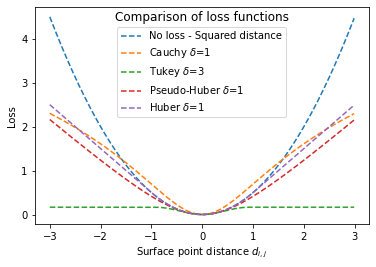

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

b=1
def NoLoss(x,b):
    return x*x/2
def Huber(x,b):
    if (np.fabs(x)<=b): return 1/2.0*x*x
    else: return b*(np.fabs(x)-b/2.0)
def Cauchy(x,b):
    return np.log(1+np.square(x/b))
def SoftL1(x,b):
    return b*b*(np.sqrt(1+np.square(x/b))-1)
def Turkey(x,b):
    if(np.fabs(x)<=b): return b*b / 6 * (1 - (np.power(1 - np.power(x / b,2),3)))
    else: return b*b / 6
    
    


x = np.arange(-3, 3, 0.01)

y_none = []
for i in range(len(x)):
   y_none.append(NoLoss(x[i],b))
y_huber = []
for i in range(len(x)):
   y_huber.append(Huber(x[i],b))

y_cauchy = []
for i in range(len(x)):
   y_cauchy.append(Cauchy(x[i],b))

y_softl1 = []
for i in range(len(x)):
   y_softl1.append(SoftL1(x[i],b))

y_tukey = []
for i in range(len(x)):
   y_tukey.append(Turkey(x[i],1))


y_combined = []
for i in range(len(x)):
   y_combined.append(Huber(Cauchy(x[i],0.01),0.1))

plt.figure()
fig, ax = plt.subplots()

plt.plot(x, y_none, '--',   label='No loss - Squared distance')
plt.plot(x, y_cauchy, '--', label='Cauchy $\delta$=1')
plt.plot(x, y_tukey, '--',  label='Tukey $\delta$=3')
plt.plot(x, y_softl1, '--', label='Pseudo-Huber $\delta$=1')
plt.plot(x, y_huber, '--',  label='Huber $\delta$=1')



#plt.plot(x, y_combined, 'y-')
leg = ax.legend(loc='center',bbox_to_anchor=(0.5, 0, 0.0, 1.4));
#ax.set_title('Residuals scaled by loss function',fontsize=10,loc='center')


#ax.set_xlabel(')
ax.set_ylabel('Loss')
#plt.axis('equal')
#ax.xaxis.set_label_position('top')
ax.set_xlabel('Surface point distance $d_{i,j}$')
ax.set_title('Comparison of loss functions', y=1.0, pad=-14)
plt.savefig('./output/robust_loss.png')
plt.savefig('./output/robust_loss.pdf')



#dd=df.sort_values(by=["z min", "k strongest"])
#filter_tab = dd.pivot_table(index='k strongest', columns='z min', values='Filtering avg')
#sns_plot_2 = sns.heatmap(filter_tab,vmin=3, vmax=20, cmap="coolwarm",annot=True, fmt=".1f",cbar_kws={'label': 'Computation time [ms]'},annot_kws={"size": 10})
#plt.title('Filtering time due to k-strong and z min')
#fig2=sns_plot_2.get_figure()
#fig2.savefig('./output/k-strongest_time.eps', format='eps')
#fig2.savefig('./output/k-strongest_time.png', format='png', dpi=1000)


δ
Index(['z min', 'min distance', 'max distance', 'k strongest',
       'topic_filtered', 'radar_frameid', 'dataset', 'input_points_topic',
       'scan_registered_latest_topic', 'scan_registered_keyframe_topic',
       'odom_latest_topic', 'odom_keyframe_topic', 'use raw pointcloud',
       'submap keyframes', 'resolution r [m]', 'resample factor f',
       'min. sensor distance [m]', 'min. sensor rot. [deg]', 'use keyframe',
       'use initial guess', 'radar reversed', 'disable registration',
       'soft velocity constraint', 'compensate', 'cost type', 'loss type', 'δ',
       'todom_est_topic', 'gt_topic', 'est_output_dir', 'gt_output_dir',
       'sequence', 'job nr', 'nr_frames', 'Filtered points avg',
       'Filtered points dev [σ]', 'Filtered points count',
       'Surface points avg', 'Surface points dev [σ]', 'Surface points count',
       'Registration avg', 'Registration dev [σ]', 'Registration count',
       'Filtering avg', 'Filtering dev [σ]', 'Filtering count',
      

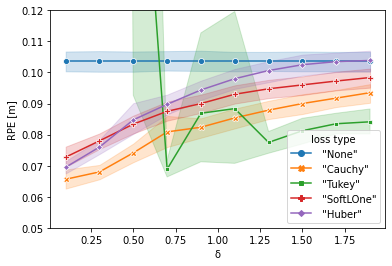

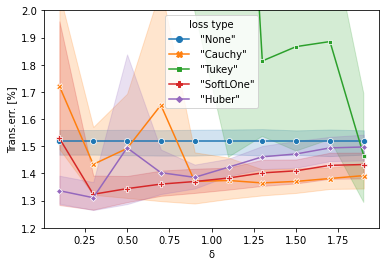

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from pandas.api.types import CategoricalDtype

x=str(u'\u03B4')
print(x)

df = pd.read_csv('./oxford-cfear2(p2p)-loss_2021-10-13_10:21_eval.csv', sep=r',', header=0)

#df = df.rename(columns={'Transl.Error': 'Transl. Error[%]'})
df = df.rename(columns={'resolution r': 'resolution r [m]'})
df = df.rename(columns={'loss limit': x})
dd=df[df["loss type"]=='"None"']
print(dd)

##############################


print(df.columns)
plt.figure(1)
ax1=sns.lineplot(data=df, x=x, y="RPE [m]", hue="loss type",style="loss type",markers=True, dashes=False) 
plt.ylim(0.05,0.12)
fig = ax1.get_figure()
fig.savefig('./output/loss_error_rpe.pdf', format='pdf')
fig.savefig('./output/loss_error_rpe.png', format='png', dpi=200)



plt.figure(2)
ax1=sns.lineplot(data=df, x=x, y="Trans.err. [%]", hue="loss type",style="loss type",markers=True, dashes=False) 
plt.ylim(1.2,2.0)
fig = ax1.get_figure()
fig.savefig('./output/loss_error_odom_error.pdf', format='pdf')
fig.savefig('./output/loss_error_odom_error.png', format='png', dpi=200)





In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
from pandas.api.types import CategoricalDtype

x=str(u'\u03B4')
print(x)

df = pd.read_csv('./oxford-cfear2(p2p)-loss_2021-10-13_10:21_eval.csv', sep=r',', header=0)

#df = df.rename(columns={'Transl.Error': 'Transl. Error[%]'})
df = df.rename(columns={'resolution r': 'resolution r [m]'})
df = df.rename(columns={'loss limit': x})
df = df.rename(columns={'loss type': x})
df=df[df[x]==0.1]

loss_type=' "None"'
dd=df[df["loss type"]==loss_type]
print(loss_type+" "+str(dd["RPE [m]"].mean()))

loss_type=' "SoftLOne"'
dd=df[df["loss type"]==loss_type]
print(loss_type+" "+str(dd["RPE [m]"].mean()))

loss_type=' "Huber"'
dd=df[df["loss type"]==loss_type]
print(loss_type+" "+str(dd["RPE [m]"].mean()))

loss_type=' "Cauchy"'
dd=df[df["loss type"]==loss_type]
print(loss_type+" "+str(dd["RPE [m]"].mean()))

loss_type=' "Tukey"'
dd=df[df["loss type"]==loss_type]
print(loss_type+" "+str(dd["RPE [m]"].mean()))

δ
 "None" 0.10375000000000001
 "SoftLOne" 0.07275000000000001
 "Huber" 0.0695
 "Cauchy" 0.065625
 "Tukey" 4.95575
